In [1]:
import pandas as pd
import numpy as np
import gc; gc.enable()

In [2]:
usecols = [
    'item_id',
    'user_id',
    'region',
    'city',
    'parent_category_name',
    'category_name',
    'title',
    'description',
    'price',
    'item_seq_number',
    'activation_date']

In [3]:
def process_chunk(df):
    print('Original data shape', df.shape)
    df = df.loc[~df.activation_date.isnull(),:].reset_index(drop=True)
    df = df.loc[~df.user_id.isnull(),:].reset_index(drop=True)
    print('New data shape', df.shape)
    
    for c in ['item_id', 'region', 'city', 'parent_category_name', 'category_name', 'title', 'description']:
        df.loc[:, c] = df[c].fillna('unknown')
    
    for c in ['price', 'item_seq_number']:
        df.loc[:, c] = df[c].fillna(-1)
        
    for col in ['title', 'description']:
        df[col+'_len'] = df[col].apply(len)
        df[col+'_word_cnt'] = df[col].apply(lambda x: len(x.split()) if x != 'unknown' else 0)
        df[col+'_unique_word_cnt'] = df[col].apply(lambda x: len(set(x.split())) if x != 'unknown' else 0)
        df[col+'_unqiue_percent'] = df[col+'_unique_word_cnt'] / df[col+'_word_cnt']
        
    df.drop(['title', 'description'], axis=1, inplace=True)
    return df

In [4]:
files = [
    'data/train.csv', 'data/test.csv', 'data/train_active.csv', 'data/test_active.csv'
]
all_df = None

for f in files:
    print('Processing file:', f)
    for chunk in pd.read_csv(f, usecols=usecols, chunksize=1000000):
        chunk = process_chunk(chunk)
        gc.collect()
        if all_df is None:
            all_df = chunk
        else:
            all_df = pd.concat([all_df, chunk]).reset_index(drop=True)
            del chunk; gc.collect()

Processing file: data/train.csv
Original data shape (1000000, 11)
New data shape (1000000, 11)
Original data shape (503424, 11)
New data shape (503424, 11)
Processing file: data/test.csv
Original data shape (508438, 11)
New data shape (508438, 11)
Processing file: data/train_active.csv
Original data shape (1000000, 11)
New data shape (991323, 11)
Original data shape (1000000, 11)
New data shape (991191, 11)
Original data shape (1000000, 11)
New data shape (991215, 11)
Original data shape (1000000, 11)
New data shape (991290, 11)
Original data shape (1000000, 11)
New data shape (990972, 11)
Original data shape (1000000, 11)
New data shape (991187, 11)
Original data shape (1000000, 11)
New data shape (991096, 11)
Original data shape (1000000, 11)
New data shape (991241, 11)
Original data shape (1000000, 11)
New data shape (991227, 11)
Original data shape (1000000, 11)
New data shape (991282, 11)
Original data shape (1000000, 11)
New data shape (991212, 11)
Original data shape (1000000, 1

In [5]:
all_df.shape

(28726910, 17)

In [6]:
all_df.isnull().sum()

item_id                              0
user_id                              0
region                               0
city                                 0
parent_category_name                 0
category_name                        0
price                                0
item_seq_number                      0
activation_date                      0
title_len                            0
title_word_cnt                       0
title_unique_word_cnt                0
title_unqiue_percent              1020
description_len                      0
description_word_cnt                 0
description_unique_word_cnt          0
description_unqiue_percent     1141141
dtype: int64

In [7]:
all_df.loc[:, 'title_unqiue_percent'] = all_df['title_unqiue_percent'].fillna(0.)
all_df.loc[:, 'description_unqiue_percent'] = all_df['description_unqiue_percent'].fillna(0.)

In [8]:
all_df

,item_id,user_id,region,city,parent_category_name,category_name,price,item_seq_number,activation_date,title_len,title_word_cnt,title_unique_word_cnt,title_unqiue_percent,description_len,description_word_cnt,description_unique_word_cnt,description_unqiue_percent
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,400.0,2.0,2017-03-28,21,3,3,1.0,58,7,7,1.000000
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,3000.0,19.0,2017-03-26,17,3,3,1.0,41,7,7,1.000000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,4000.0,9.0,2017-03-20,14,2,2,1.0,99,17,17,1.000000
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,2200.0,286.0,2017-03-25,10,1,1,1.0,22,3,3,1.000000
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,40000.0,3.0,2017-03-16,14,3,3,1.0,24,4,4,1.000000
5,51e0962387f7,bbfad0b1ad0a,Татарстан,Чистополь,Личные вещи,Товары для детей и игрушки,1300.0,9.0,2017-03-28,11,2,2,1.0,19,3,3,1.000000
6,c4f260a2b48a,08f469d2e6f7,Нижегородская область,Нижний Новгород,Для дома и дачи,Ремонт и строительство,11000.0,125.0,2017-03-23,45,5,5,1.0,141,21,19,0.904762
7,6b71309d6a8a,fef86baa002c,Пермский край,Пермь,Личные вещи,"Одежда, обувь, аксессуары",500.0,61.0,2017-03-25,16,2,2,1.0,30,4,4,1.000000
8,c5b969cb63a2,055825270190,Оренбургская область,Оренбург,Личные вещи,"Одежда, обувь, аксессуары",500.0,85.0,2017-03-17,6,1,1,1.0,24,5,5,1.000000
9,b1570962e68c,f9e8f831d94c,Нижегородская область,Нижний Новгород,Личные вещи,Детская одежда и обувь,400.0,136.0,2017-03-22,33,4,4,1.0,65,11,11,1.000000


In [9]:
all_df.to_csv('data/merged_active.csv', index=False)

## Feature engineering

In [1]:
import pandas as pd
import numpy as np
import gc; gc.enable()

In [2]:
all_df = pd.read_csv('data/merged_active.csv', parse_dates=['activation_date'])

In [3]:
all_df = all_df.sort_values(['activation_date']).reset_index(drop=True)

In [6]:
all_df

,item_id,user_id,region,city,parent_category_name,category_name,price,item_seq_number,activation_date,title_len,title_word_cnt,title_unique_word_cnt,title_unqiue_percent,description_len,description_word_cnt,description_unique_word_cnt,description_unqiue_percent
0,b467a916365f,07ca3b07f063,Челябинская область,Челябинск,Личные вещи,"Одежда, обувь, аксессуары",100.0,36.0,2017-03-15,5,1,1,1.0,326,64,45,0.703125
1,c30d9fbe75c9,b22dfefbba3f,Свердловская область,Качканар,Транспорт,Автомобили,600000.0,5.0,2017-03-15,19,3,3,1.0,38,7,7,1.000000
2,ace44b746d95,199f5ce30be9,Челябинская область,Челябинск,Хобби и отдых,Велосипеды,1000.0,2.0,2017-03-15,16,2,2,1.0,362,43,41,0.953488
3,edcc4fa3480e,00ee75e70a20,Свердловская область,Первоуральск,Личные вещи,Детская одежда и обувь,1000.0,120.0,2017-03-15,12,2,2,1.0,190,19,19,1.000000
4,2df49feb5efa,81963bfa4dcf,Владимирская область,Владимир,Личные вещи,"Одежда, обувь, аксессуары",500.0,119.0,2017-03-15,14,2,2,1.0,71,10,10,1.000000
5,8ffa2d87c55a,883ba0d26d68,Ростовская область,Ростов-на-Дону,Личные вещи,Красота и здоровье,2000.0,133.0,2017-03-15,44,5,5,1.0,134,20,18,0.900000
6,ed8858045b1e,2daa4c664d99,Пермский край,Лобаново,Услуги,Предложение услуг,0.0,71.0,2017-03-15,40,6,6,1.0,167,20,19,0.950000
7,7ca4ac671556,7e1860fe0386,Самарская область,Самара,Личные вещи,Детская одежда и обувь,400.0,27.0,2017-03-15,21,2,2,1.0,35,5,5,1.000000
8,973a2f2871a1,71361bde2cf8,Краснодарский край,Сочи,Услуги,Предложение услуг,0.0,7.0,2017-03-15,16,2,2,1.0,195,23,21,0.913043
9,8828373eaee7,a709c483fe87,Саратовская область,Саратов,Хобби и отдых,Спорт и отдых,400.0,13.0,2017-03-15,22,4,4,1.0,46,7,7,1.000000


In [7]:
all_df.isnull().sum()

item_id                        0
user_id                        0
region                         0
city                           0
parent_category_name           0
category_name                  0
price                          0
item_seq_number                0
activation_date                0
title_len                      0
title_word_cnt                 0
title_unique_word_cnt          0
title_unqiue_percent           0
description_len                0
description_word_cnt           0
description_unique_word_cnt    0
description_unqiue_percent     0
dtype: int64

In [8]:
cols = [
    'price', 
    'title_len',
    'title_word_cnt',
    'title_unique_word_cnt',
    'title_unqiue_percent',
    'description_len',
    'description_word_cnt',
    'description_unique_word_cnt',
    'description_unqiue_percent',
]

In [ ]:
res = pd.DataFrame()
res['activation_date'] = all_df.activation_date.astype(str).unique()

In [8]:
for c in cols:
    selected_df = all_df[[c, 'activation_date']][all_df[c] >= 0]
    gp = selected_df.groupby(['activation_date'])
    
    res.loc[:, 'avg_'+c] = (cumsum[c]/cumcnt).reindex(all_df.index).ffill()
    print(c+' processed')
    del selected_df, gp, cumsum, cumcnt; gc.collect()

price processed
title_len processed
title_word_cnt processed
title_unique_word_cnt processed
title_unqiue_percent processed
description_len processed
description_word_cnt processed
description_unique_word_cnt processed
description_unqiue_percent processed


In [9]:
cols = [
    'item_id',
    'city',
    'region',
    'parent_category_name',
    'category_name'
]

In [10]:
for c in cols:
    temp=all_df[['user_id', c]].drop_duplicates().groupby('user_id').cumcount()+1
    cumcnt = all_df.groupby('user_id').cumcount()+1
    
    res.loc[:,'avg_types_'+c] = temp.reindex(all_df.index).ffill()/cumcnt
    print(c+' processed')
    del temp, cumcnt; gc.collect()

item_id processed
city processed
region processed
parent_category_name processed
category_name processed


In [11]:
res

,user_id,item_id,activation_date,avg_price,avg_title_len,avg_title_word_cnt,avg_title_unique_word_cnt,avg_title_unqiue_percent,avg_description_len,avg_description_word_cnt,avg_description_unique_word_cnt,avg_description_unqiue_percent,avg_types_item_id,avg_types_city,avg_types_region,avg_types_parent_category_name,avg_types_category_name
0,00000077ff21,371634034b2b,2017-03-15,5.500000e+03,17.000000,4.000000,4.000000,1.000000,629.000000,95.000000,92.000000,0.968421,1.000000,1.000000,1.000000,1.000000,1.000000
1,00000077ff21,3f13f59b23da,2017-03-24,2.750000e+03,16.500000,3.000000,3.000000,1.000000,342.000000,52.000000,50.500000,0.984211,1.000000,0.500000,0.500000,1.000000,1.000000
2,00000077ff21,3f13f59b23da,2017-04-12,1.833333e+03,16.333333,2.666667,2.666667,1.000000,246.333333,37.666667,36.666667,0.989474,0.666667,0.333333,0.333333,0.666667,0.666667
3,00000077ff21,371634034b2b,2017-04-12,2.750000e+03,16.500000,3.000000,3.000000,1.000000,342.000000,52.000000,50.500000,0.984211,0.500000,0.250000,0.250000,0.500000,0.500000
4,000006497719,11e2c4be4280,2017-03-15,2.950000e+06,28.000000,6.000000,6.000000,1.000000,520.000000,67.000000,61.000000,0.910448,1.000000,1.000000,1.000000,1.000000,1.000000
5,000006497719,11e2c4be4280,2017-04-12,2.950000e+06,28.000000,6.000000,6.000000,1.000000,520.000000,67.000000,61.000000,0.910448,0.500000,0.500000,0.500000,0.500000,0.500000
6,00000b4d72f6,d517b9ad807c,2017-04-15,1.000000e+05,14.000000,3.000000,3.000000,1.000000,108.000000,18.000000,17.000000,0.944444,1.000000,1.000000,1.000000,1.000000,1.000000
7,00000d642d7e,517928d18223,2017-03-15,1.000000e+03,14.000000,3.000000,3.000000,1.000000,309.000000,47.000000,44.000000,0.936170,1.000000,1.000000,1.000000,1.000000,1.000000
8,00000d642d7e,a7a229948144,2017-03-15,2.550000e+04,23.000000,3.500000,3.500000,1.000000,252.500000,37.500000,35.500000,0.950228,1.000000,0.500000,0.500000,1.000000,1.000000
9,0000126b80a4,4b24ce9bdc46,2017-03-15,6.500000e+02,48.000000,7.000000,7.000000,1.000000,459.000000,64.000000,37.000000,0.578125,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
res.isnull().sum()

user_id                            0
item_id                            0
activation_date                    0
avg_price                          0
avg_title_len                      0
avg_title_word_cnt                 0
avg_title_unique_word_cnt          0
avg_title_unqiue_percent           0
avg_description_len                0
avg_description_word_cnt           0
avg_description_unique_word_cnt    0
avg_description_unqiue_percent     0
avg_types_item_id                  0
avg_types_city                     0
avg_types_region                   0
avg_types_parent_category_name     0
avg_types_category_name            0
dtype: int64

In [13]:
del all_df; gc.collect()

28

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

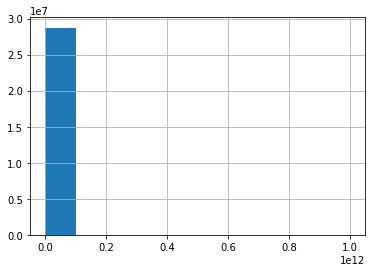

In [15]:
res.avg_price.hist()
plt.show()

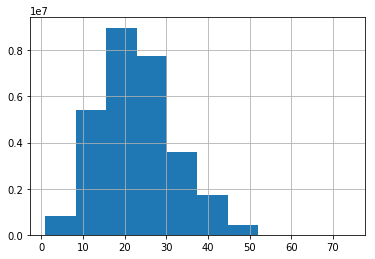

In [16]:
res.avg_title_len.hist()
plt.show()

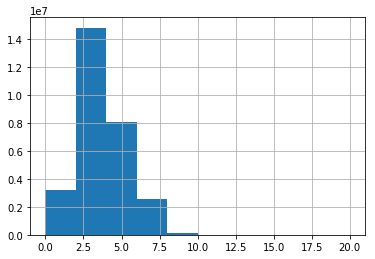

In [17]:
res.avg_title_word_cnt.hist()
plt.show()

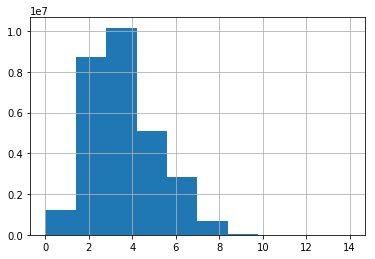

In [18]:
res.avg_title_unique_word_cnt.hist()
plt.show()

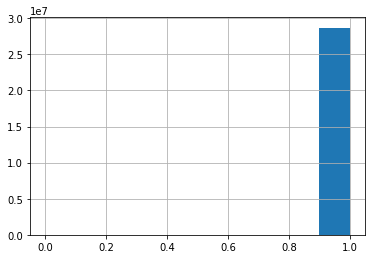

In [19]:
res.avg_title_unqiue_percent.hist()
plt.show()

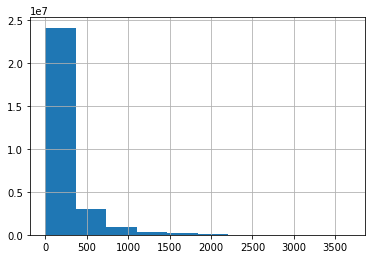

In [20]:
res.avg_description_len.hist()
plt.show()

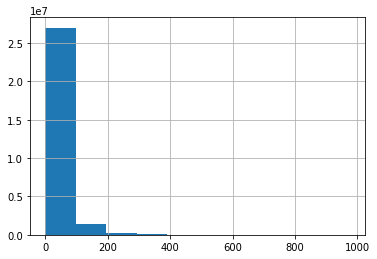

In [21]:
res.avg_description_word_cnt.hist()
plt.show()

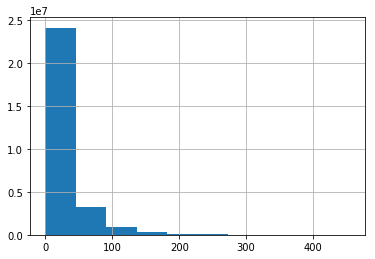

In [22]:
res.avg_description_unique_word_cnt.hist()
plt.show()

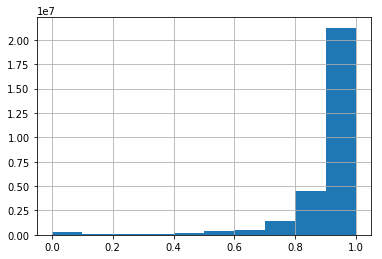

In [23]:
res.avg_description_unqiue_percent.hist()
plt.show()

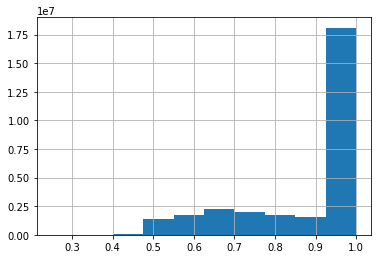

In [24]:
res.avg_types_item_id.hist()
plt.show()

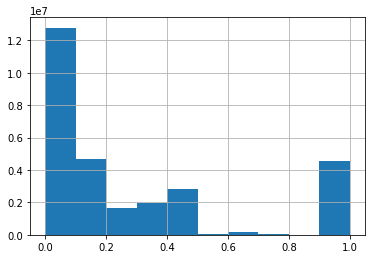

In [25]:
res.avg_types_city.hist()
plt.show()

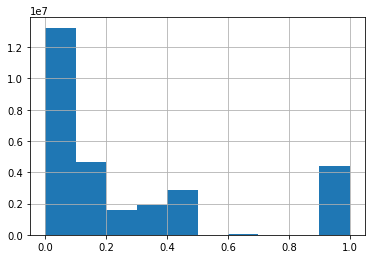

In [26]:
res.avg_types_region.hist()
plt.show()

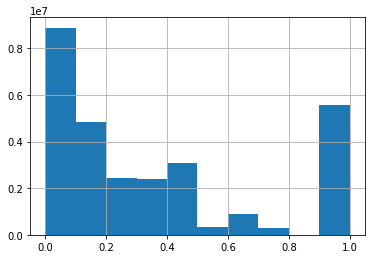

In [27]:
res.avg_types_parent_category_name.hist()
plt.show()

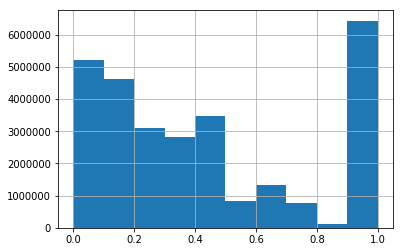

In [28]:
res.avg_types_category_name.hist()
plt.show()

## Seems all columns (except percent) needs box-cox transform

In [29]:
boxcox_cols = ['avg_price', 'avg_title_len', 'avg_title_word_cnt', 
               'avg_title_unique_word_cnt', 'avg_title_unqiue_percent', 'avg_description_len', 
               'avg_description_word_cnt', 'avg_description_unique_word_cnt', 'avg_description_unqiue_percent',
               'avg_types_item_id', 
               'avg_types_city', 'avg_types_region', 'avg_types_parent_category_name', 'avg_types_category_name']

In [30]:
from scipy.stats import boxcox

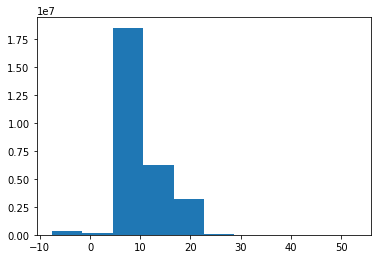

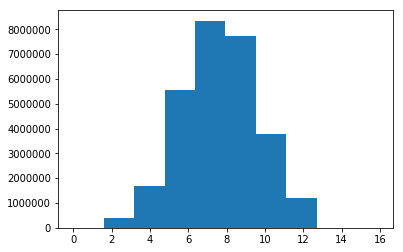

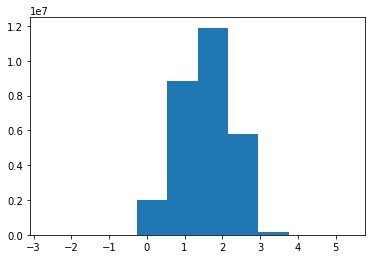

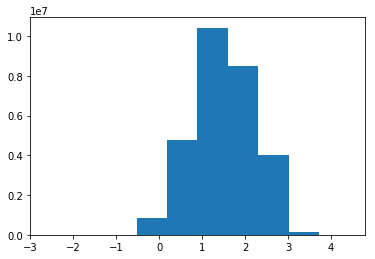

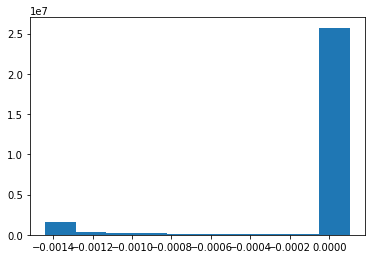

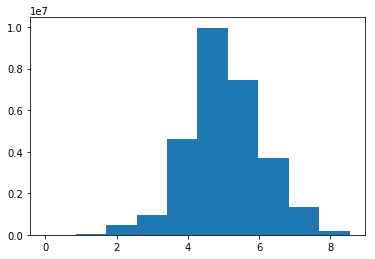

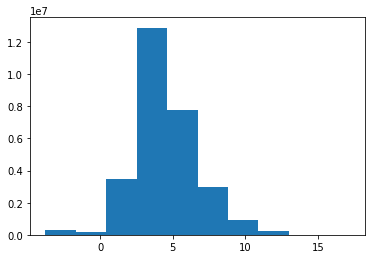

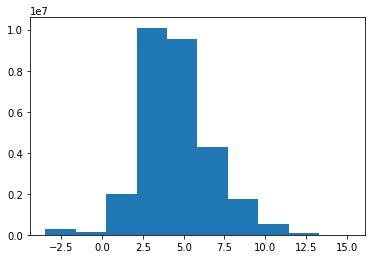

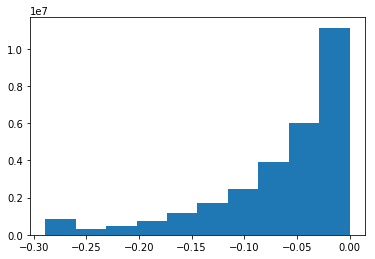

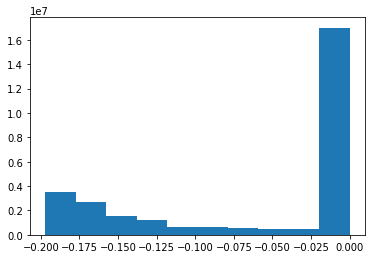

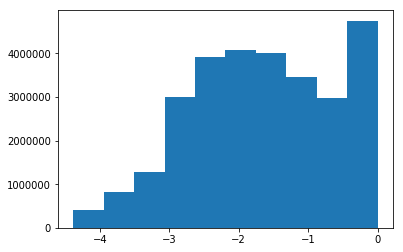

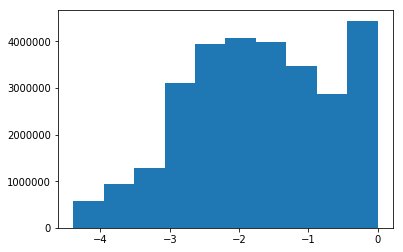

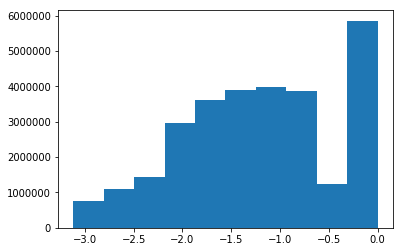

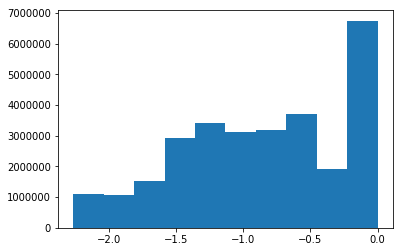

In [31]:
for c in boxcox_cols:
    tmp, lc = boxcox(res[c]+0.0001)
    plt.hist(tmp)
    plt.show()

Column avg_price transformed with optimal lambda value=0.0768709585115143


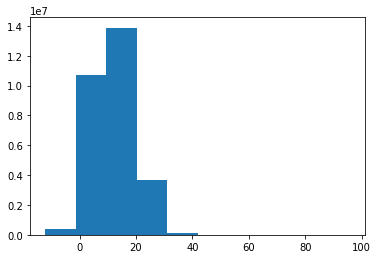

Column avg_title_len transformed with optimal lambda value=0.5150145823652873


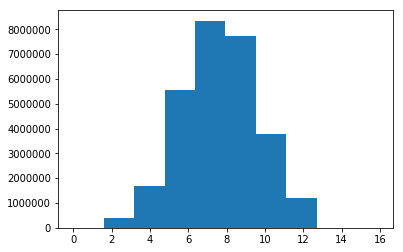

Column avg_title_word_cnt transformed with optimal lambda value=0.35819407284423355


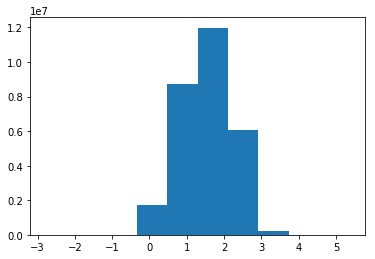

Column avg_title_unique_word_cnt transformed with optimal lambda value=0.36330794809602335


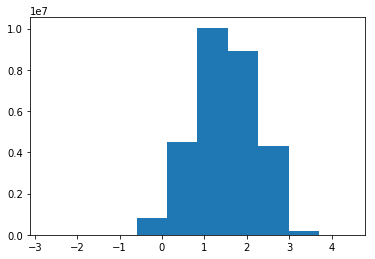

Column avg_title_unqiue_percent transformed with optimal lambda value=504.6836914696562


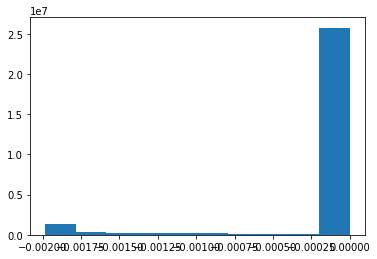

Column avg_description_len transformed with optimal lambda value=0.009773394448722033


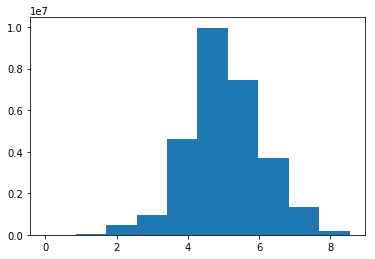

Column avg_description_word_cnt transformed with optimal lambda value=0.2261705263917738


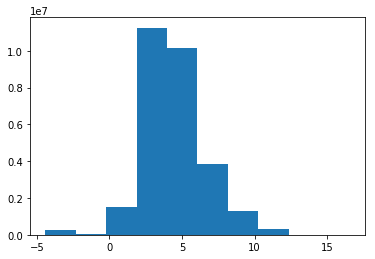

Column avg_description_unique_word_cnt transformed with optimal lambda value=0.24446648515594419


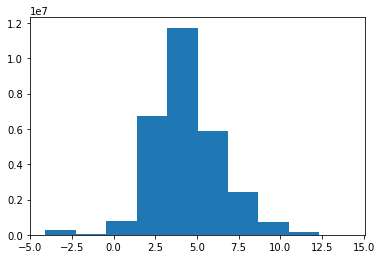

Column avg_description_unqiue_percent transformed with optimal lambda value=1.4164965694208427


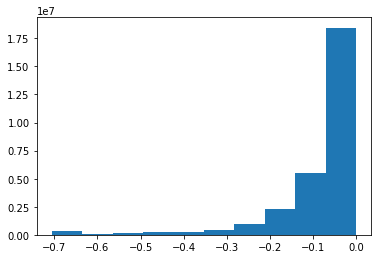

Column avg_types_item_id transformed with optimal lambda value=5.069436798799751


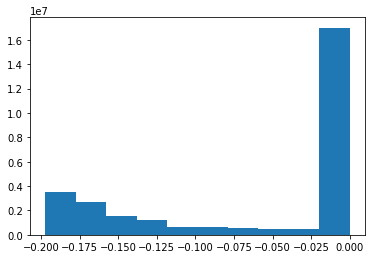

Column avg_types_city transformed with optimal lambda value=0.18141892894879197


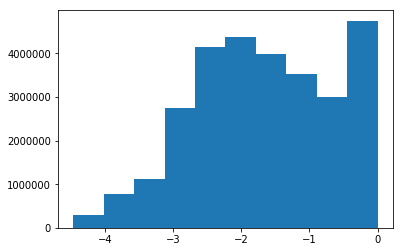

Column avg_types_region transformed with optimal lambda value=0.1812067178154495


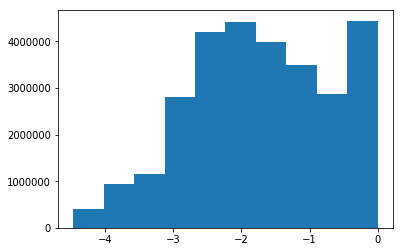

Column avg_types_parent_category_name transformed with optimal lambda value=0.294408380225519


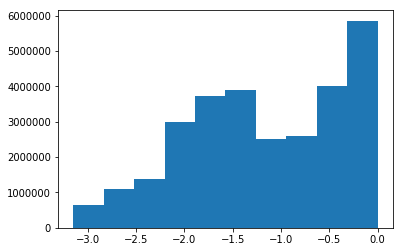

Column avg_types_category_name transformed with optimal lambda value=0.42657369516226457


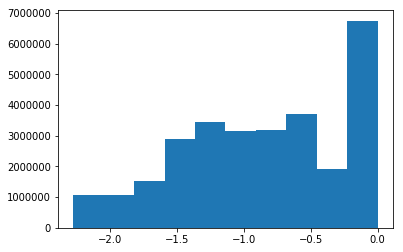

In [32]:
for c in boxcox_cols:
    res.loc[:, c], ld = boxcox(res[c]+1e-15)
    print('Column {} transformed with optimal lambda value={}'.format(c, ld))
    plt.hist(res[c])
    plt.show()

### Normalize to [0, 1]

Column avg_price normalized to [0,1]


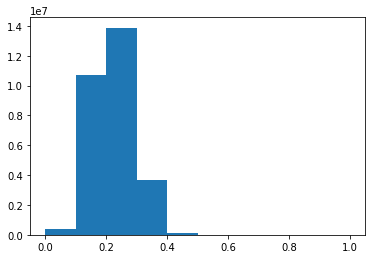

Column avg_title_len normalized to [0,1]


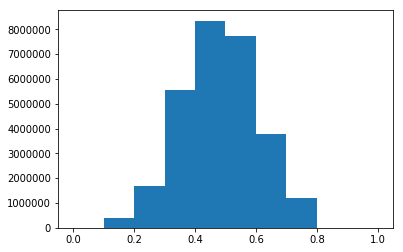

Column avg_title_word_cnt normalized to [0,1]


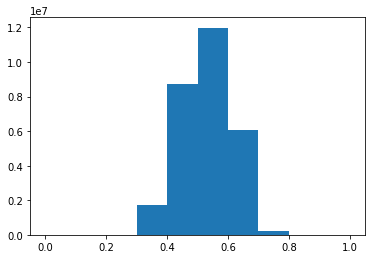

Column avg_title_unique_word_cnt normalized to [0,1]


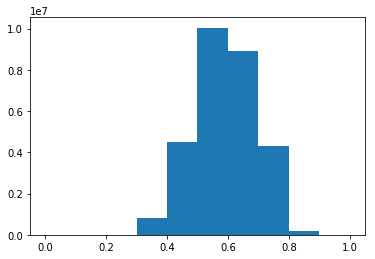

Column avg_title_unqiue_percent normalized to [0,1]


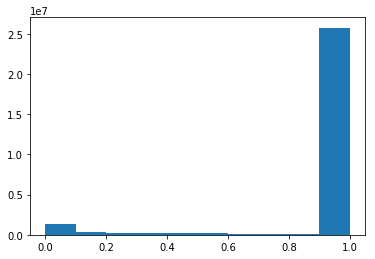

Column avg_description_len normalized to [0,1]


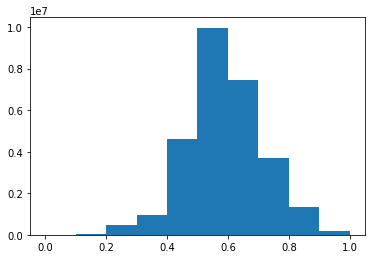

Column avg_description_word_cnt normalized to [0,1]


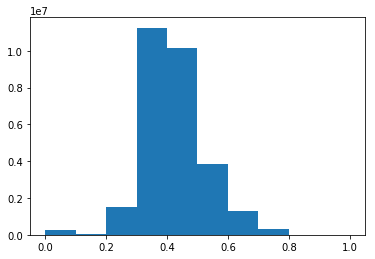

Column avg_description_unique_word_cnt normalized to [0,1]


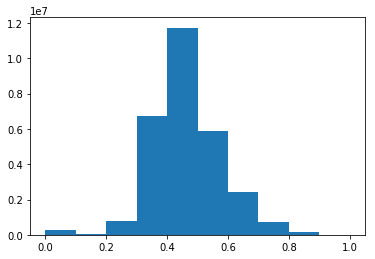

Column avg_description_unqiue_percent normalized to [0,1]


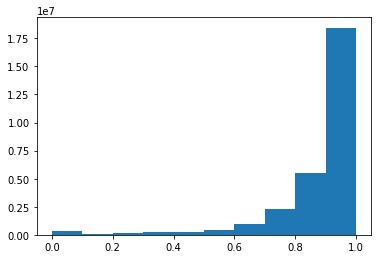

Column avg_types_item_id normalized to [0,1]


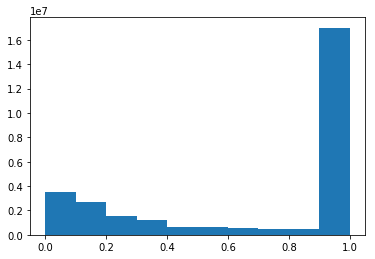

Column avg_types_city normalized to [0,1]


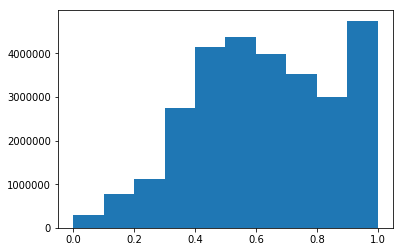

Column avg_types_region normalized to [0,1]


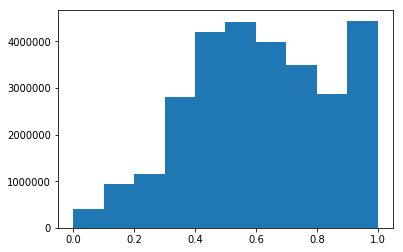

Column avg_types_parent_category_name normalized to [0,1]


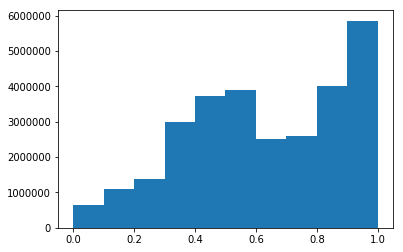

Column avg_types_category_name normalized to [0,1]


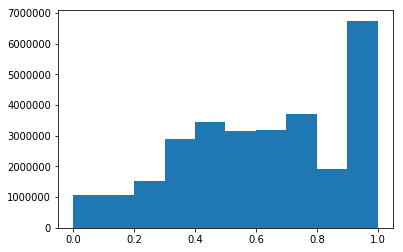

In [33]:
for c in boxcox_cols:
    res.loc[:, c] = (res[c]-res[c].min())/(res[c].max()-res[c].min())
    print('Column {} normalized to [0,1]'.format(c))
    plt.hist(res[c])
    plt.show()

In [34]:
res.isnull().sum()

user_id                            0
item_id                            0
activation_date                    0
avg_price                          0
avg_title_len                      0
avg_title_word_cnt                 0
avg_title_unique_word_cnt          0
avg_title_unqiue_percent           0
avg_description_len                0
avg_description_word_cnt           0
avg_description_unique_word_cnt    0
avg_description_unqiue_percent     0
avg_types_item_id                  0
avg_types_city                     0
avg_types_region                   0
avg_types_parent_category_name     0
avg_types_category_name            0
dtype: int64

In [35]:
res.to_csv('active_features.csv', index=False)